In [1]:
import pandas
import ast
import datetime
import matplotlib.pyplot as plt

In [2]:
# read dataframe
d=pandas.read_csv("data/df2020-03-01.csv")
# Convert string representation of list to list
d['values']=d['values'].apply(lambda x : ast.literal_eval(x))

In [3]:
d.head()

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values
0,0,1.0,Table,Situation report - 40Coronavirus disease 2019 ...,True,True,[1]
1,1,1.0,COVID,Situation report - 40Coronavirus disease 2019 ...,True,True,"[0, 19]"
2,2,1.0,Data as of,Situation report - 40Coronavirus disease 2019 ...,True,True,"[2, 9]"
3,3,1.0,Hubei,Situation report - 40Coronavirus disease 2019 ...,True,True,"[5917, 423, 159, 45, 66337, 2727]"
4,4,1.0,Guangdong,Situation report - 40Coronavirus disease 2019 ...,True,True,"[11346, 1, 0, 0, 1349, 7]"


In [4]:
# get date from report string: find ')' character and then there is the date
# d['report'].unique()
d['date']=d['report'].apply(lambda x: datetime.datetime.strptime(x[x.index(')')+1:].strip(), '%d %B %Y'))
d=d.sort_values(by=['date'])
d.head()

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date
3185,30,1.0,.int/ith/2020,Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[0, 901]",2020-01-21
3155,0,0.0,confirmed,Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[2019, 0]",2020-01-21
3156,1,1.0,reported confirmed cases of 2019,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[0],2020-01-21
3157,2,1.0,",",Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[20, 20, 20]",2020-01-21
3158,3,1.0,Hubei Province,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[258],2020-01-21


In [5]:
# the number of confirmed cases is in values list, the position depends on the structure of the report
# (NOTE: for china's places WHO changes structure so last reports are different from the first ones)


# there should be a row for each situation report and country
# the situation reports have different structures, WHO do not keep the same structure for all the reports
# but there are some wrong records that are not related to country so detect them in order to remove them
# so try to group by report and detect for each report the wrong records
d['n_values']=d['values'].apply(lambda x: len(x))
d.head()

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date,n_values
3185,30,1.0,.int/ith/2020,Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[0, 901]",2020-01-21,2
3155,0,0.0,confirmed,Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[2019, 0]",2020-01-21,2
3156,1,1.0,reported confirmed cases of 2019,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[0],2020-01-21,1
3157,2,1.0,",",Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[20, 20, 20]",2020-01-21,3
3158,3,1.0,Hubei Province,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[258],2020-01-21,1


In [6]:
d[d['name']=='Hubei']

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date,n_values
2348,2,1.0,Hubei,Situation report - 13Novel Coronavirus (2019-n...,False,False,[9074],2020-02-02,1
2252,2,1.0,Hubei,Situation report - 14 - Erratum Novel Coronavi...,False,False,[11177],2020-02-03,1
2166,2,1.0,Hubei,Situation report - 15Novel Coronavirus (2019-n...,False,False,[13522],2020-02-04,1
2083,2,1.0,Hubei,Situation report - 16 - ErratumNovel Coronavir...,False,False,[16678],2020-02-05,1
1970,2,1.0,Hubei,Situation report - 18Novel Coronavirus (2019-n...,False,False,"[22, 112]",2020-02-07,2
1859,2,1.0,Hubei,Situation report - 19Novel Coronavirus (2019-n...,False,False,"[24, 953]",2020-02-08,2
1770,2,1.0,Hubei,Situation report - 20Novel Coronavirus (2019-n...,False,False,"[27, 100]",2020-02-09,2
1679,2,1.0,Hubei,Situation report - 21Novel Coronavirus (2019-n...,False,False,[29631],2020-02-10,1
1562,2,1.0,Hubei,Situation report - 22Novel Coronavirus (2019-n...,False,False,[31728],2020-02-11,1
1467,4,1.0,Hubei,Situation report - 23Coronavirus disease 2019 ...,False,True,"[5917, 33366, 11295, 1068]",2020-02-12,4


In [7]:
# set index of number of cases in values list
d['idx_cases']=-1
d.loc[~d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=1 # this is for china data, get second value
d.loc[d['structureWithDailyNumbers'] & d['structureWithPopulation'],'idx_cases']=-2 # this is for china data, get second to last value
d.loc[d['n_table']>1,'idx_cases']=0 # records not in the first table (table not with china data) has the value in first position
d.loc[d['n_values']==1,'idx_cases']=0 # there is only one value
# this is for china data, if there is no index set than this is the case for taking first one and multiply values by 1000
d.loc[d['idx_cases']==-1,'values']=d.loc[d['idx_cases']==-1,'values'].apply(lambda x: [el*1000 for el in x])
d.loc[d['idx_cases']==-1,'idx_cases']=0

d.head()

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date,n_values,idx_cases
3185,30,1.0,.int/ith/2020,Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[0, 901000]",2020-01-21,2,0
3155,0,0.0,confirmed,Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[2019000, 0]",2020-01-21,2,0
3156,1,1.0,reported confirmed cases of 2019,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[0],2020-01-21,1,0
3157,2,1.0,",",Situation report - 1Novel Coronavirus (2019-nC...,False,False,"[20000, 20000, 20000]",2020-01-21,3,0
3158,3,1.0,Hubei Province,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[258],2020-01-21,1,0


In [8]:
# check length limits
# not greater than length
d.loc[d['idx_cases']>=d['n_values'],'idx_cases']=d.loc[d['idx_cases']>=d['n_values'],'n_values']-1
# not lower than length
d.loc[d['idx_cases']+d['n_values']<0,'idx_cases']=0 # china data that take the third to last but there is not enough values, so take the first one

In [9]:
d['cases']=[row['values'][min(row['idx_cases'],row['n_values']-1)] for index, row in d.iterrows()]


In [10]:
d['name']=d['name'].str.replace(' Municipality','') # remove Municipality substring in order to have the same name for all reports
d['name']=d['name'].str.replace('conveyance (Japan)','(Diamond Princess)') # use only (Diamond Princess) instead of other aliases

In [24]:
cm=d.groupby(['name']).agg({'cases':['max']})
cm.columns = ['_'.join(col) for col in cm.columns]
cm=cm.reset_index()
cm=cm.sort_values(by=['cases_max'],ascending=False)
cm

,name,cases_max
333,https://www.cdc.go.kr/board/board.es?mid=a,20501000000
118,January,2020000
214,WHO travel advice for international travel and...,2019000
102,Household transmission investigation protocol for,2019000
426,prevention and control of,2019000
312,for human infection with,2019000
302,eveloped the surveillance case definitions for...,2019000
265,confirmed,2019000
207,Total,982000
208,Totals,68584


In [39]:
# get countries with more cases
min_cases=800
cm=cm[cm['cases_max']>min_cases] # consider at least min_cases
# remove rows with invalid names and rows with number of cases equals to 2019 and 2020, these are wrong records
cm=cm[~cm['name'].str.contains('otal|^((?![a-zA-Z]))|\d|https',regex=True)]
cm=cm[(cm['cases_max']!=2019) & (cm['cases_max']!=2020) & (cm['cases_max']!=2019000)]
cm=cm[~cm['name'].str.contains('January|,|/|nCoV|\(|Unspecified',regex=True)]
countries=[c for c in cm['name'] if c not in 'ubei the remaining on regions Table']
countries

c:\users\a\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


['Hubei',
 'Republic of Korea',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'Hunan',
 'Singapore',
 'Japan',
 'Anhui',
 'Fujian',
 'Jiangxi',
 'Italy']

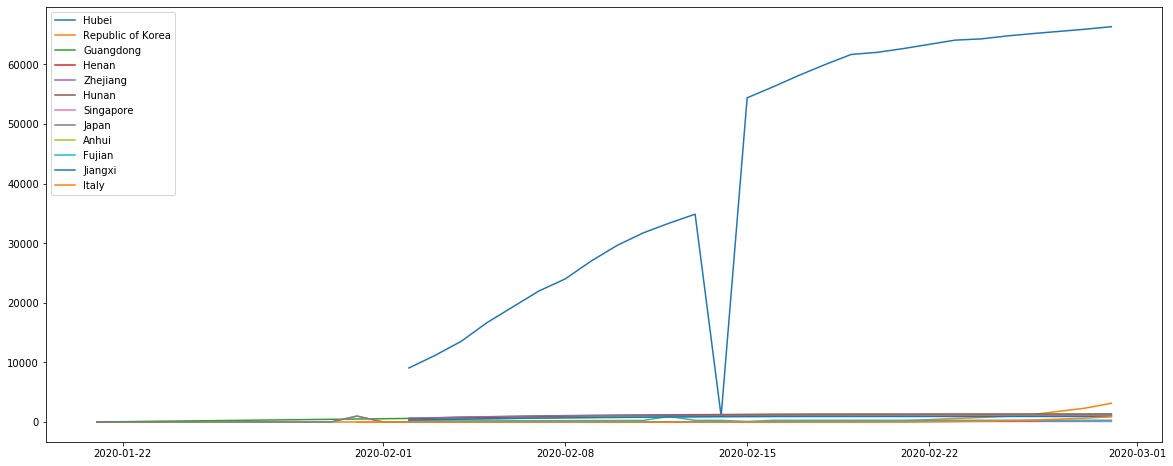

In [40]:
plt.figure(figsize=(20,8))
for country in countries:
    plt.plot( 'date', 'cases', data=d[d['name']==country], marker='', label=country)
plt.legend()


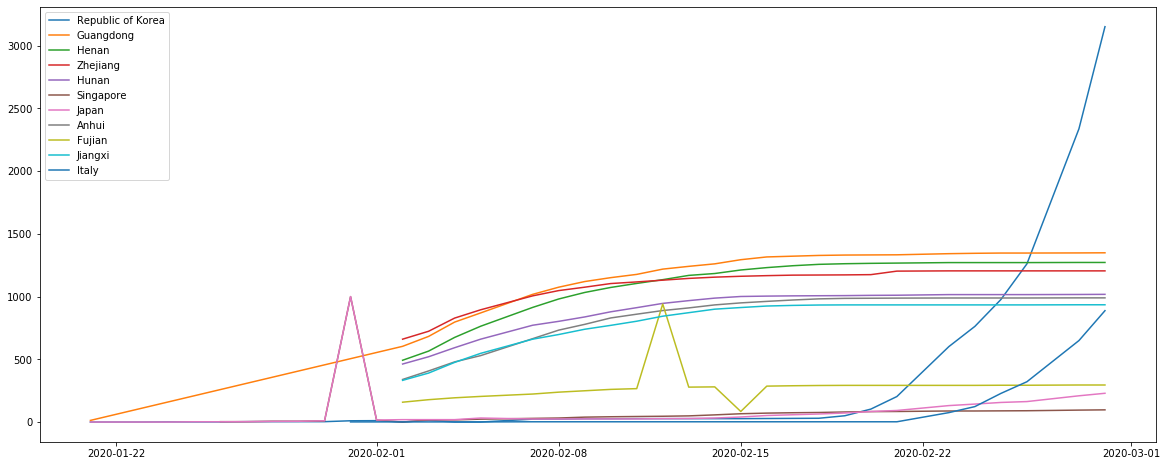

In [41]:
countries = [c for c in countries if c != 'Hubei']
plt.figure(figsize=(20,8))
for country in countries:
    plt.plot( 'date', 'cases', data=d[d['name']==country], marker='', label=country)
plt.legend()


In [42]:
d[d['name']=='Italy']

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date,n_values,idx_cases,cases
2518,21,1.0,Italy,Situation report - 11Novel Coronavirus (2019-n...,False,False,[2],2020-01-31,1,0,2
2482,58,2.0,Italy,Situation report - 12Novel Coronavirus (2019-n...,False,False,[2],2020-02-01,1,0,2
2404,58,2.0,Italy,Situation report - 13Novel Coronavirus (2019-n...,False,False,[2],2020-02-02,1,0,2
2321,71,2.0,Italy,Situation report - 14 - Erratum Novel Coronavi...,False,False,"[2, 2, 0, 0, 0]",2020-02-03,5,0,2
2228,64,2.0,Italy,Situation report - 15Novel Coronavirus (2019-n...,False,False,"[2, 2, 0, 0, 0]",2020-02-04,5,0,2
2141,60,2.0,Italy,Situation report - 16 - ErratumNovel Coronavir...,False,False,"[2, 2, 0, 0, 0]",2020-02-05,5,0,2
2030,62,2.0,Italy,Situation report - 18Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-07,5,0,3
1918,61,2.0,Italy,Situation report - 19Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-08,5,0,3
1829,61,2.0,Italy,Situation report - 20Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-09,5,0,3
1742,65,2.0,Italy,Situation report - 21Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-10,5,0,3


In [15]:
# let's compare trend among differenc countries
# get date for each country in wich began 50 or more cases

In [43]:
dates=d[d['cases']>=50].groupby('name').agg({'date':['first']})
dates.columns = ['_'.join(col) for col in dates.columns]
dates=dates.reset_index()
dd=d.merge(dates, on='name', how='left')

dd['day']=(dd['date']-dd['date_first']).dt.days

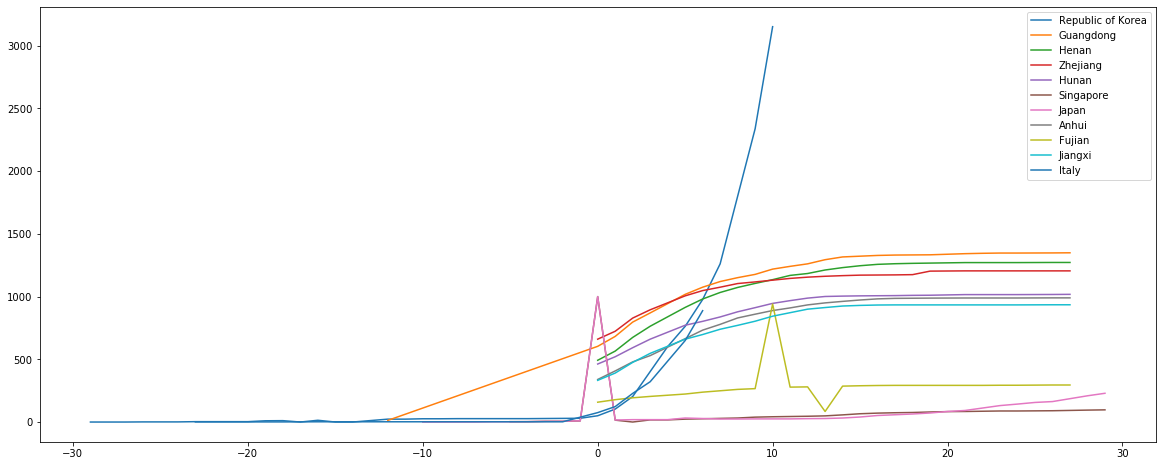

In [44]:
plt.figure(figsize=(20,8))
for country in countries:
    plt.plot( 'day', 'cases', data=dd[dd['name']==country], marker='', label=country)
plt.legend()


In [45]:
dd[dd['name']=='Republic of Korea']

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date,n_values,idx_cases,cases,date_first,day
9,8,1.0,Republic of Korea,Situation report - 1Novel Coronavirus (2019-nC...,False,False,[1],2020-01-21,1,0,1,2020-02-19,-29.0
37,20,1.0,Republic of Korea,Situation report - 2Novel Coronavirus (2019-nC...,False,False,[1],2020-01-22,1,0,1,2020-02-19,-28.0
82,23,1.0,Republic of Korea,Situation report - 3Novel Coronavirus (2019-nC...,False,False,[1],2020-01-23,1,0,1,2020-02-19,-27.0
157,23,1.0,Republic of Korea,Situation report - 4Novel Coronavirus (2019-nC...,False,False,[2],2020-01-24,1,0,2,2020-02-19,-26.0
234,6,1.0,Republic of Korea,Situation report - 5Novel Coronavirus (2019-nC...,False,False,[2],2020-01-25,1,0,2,2020-02-19,-25.0
342,26,1.0,Republic of Korea,Situation report - 6Novel Coronavirus (2019-nC...,False,False,[2],2020-01-26,1,0,2,2020-02-19,-24.0
436,3,1.0,Republic of Korea,Situation report - 7Novel Coronavirus (2019-nC...,False,False,[4],2020-01-27,1,0,4,2020-02-19,-23.0
500,4,1.0,Republic of Korea,Situation report - 8Novel Coronavirus (2019-nC...,False,False,[4],2020-01-28,1,0,4,2020-02-19,-22.0
529,5,1.0,Republic of Korea,Situation report - 9Novel Coronavirus (2019-nC...,False,False,[4],2020-01-29,1,0,4,2020-02-19,-21.0
583,4,1.0,Republic of Korea,Situation report - 10Novel Coronavirus (2019-n...,False,False,[4],2020-01-30,1,0,4,2020-02-19,-20.0


In [46]:
dd[dd['name']=='Italy']

,Unnamed: 0,n_table,name,report,structureWithDailyNumbers,structureWithPopulation,values,date,n_values,idx_cases,cases,date_first,day
683,21,1.0,Italy,Situation report - 11Novel Coronavirus (2019-n...,False,False,[2],2020-01-31,1,0,2,2020-02-23,-23.0
725,58,2.0,Italy,Situation report - 12Novel Coronavirus (2019-n...,False,False,[2],2020-02-01,1,0,2,2020-02-23,-22.0
822,58,2.0,Italy,Situation report - 13Novel Coronavirus (2019-n...,False,False,[2],2020-02-02,1,0,2,2020-02-23,-21.0
913,71,2.0,Italy,Situation report - 14 - Erratum Novel Coronavi...,False,False,"[2, 2, 0, 0, 0]",2020-02-03,5,0,2,2020-02-23,-20.0
1008,64,2.0,Italy,Situation report - 15Novel Coronavirus (2019-n...,False,False,"[2, 2, 0, 0, 0]",2020-02-04,5,0,2,2020-02-23,-19.0
1104,60,2.0,Italy,Situation report - 16 - ErratumNovel Coronavir...,False,False,"[2, 2, 0, 0, 0]",2020-02-05,5,0,2,2020-02-23,-18.0
1194,62,2.0,Italy,Situation report - 18Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-07,5,0,3,2020-02-23,-16.0
1307,61,2.0,Italy,Situation report - 19Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-08,5,0,3,2020-02-23,-15.0
1414,61,2.0,Italy,Situation report - 20Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-09,5,0,3,2020-02-23,-14.0
1505,65,2.0,Italy,Situation report - 21Novel Coronavirus (2019-n...,False,False,"[3, 3, 0, 0, 0]",2020-02-10,5,0,3,2020-02-23,-13.0
